# Statistical Inference: Significance Tests About Hypotheses

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy

import statsmodels.stats as stats

import matplotlib.pyplot as plt

%matplotlib inline

## Significance tests about means

### 9.33 Lake pollution

In [3]:
X = np.array([2000, 1000, 3000, 2000])

In [12]:
# mean
print('mean', np.mean(X))

# standard deviation
print('s', np.std(X, ddof=1))

# standard error
print('se', scipy.stats.sem(X))

mean 2000.0
s 816.496580927726
se 408.248290463863


In [5]:
from statsmodels.stats.weightstats import DescrStatsW

In [10]:
d = DescrStatsW(X, ddof=1)

In [11]:
print(d.mean, d.std, d.std_mean)

2000.0 816.496580927726 408.248290463863


In [8]:
# test statistic and p-value
tstat, pval, df = (round(x, 3) for x in d.ttest_mean(1000, alternative='larger'))
print(tstat, pval)

2.449 0.046


In [9]:
# significance level
pval < 0.05

True

### 9.35 Crossover study

In [18]:
data = pd.DataFrame(
    data={
        'F': [310, 385, 400, 310, 410, 370, 410, 320, 330, 250, 380, 340, 220], 
        'S': [270, 370, 310, 260, 380, 300, 390, 290, 365, 210, 350, 260, 90]
    })
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
F,310,385,400,310,410,370,410,320,330,250,380,340,220
S,270,370,310,260,380,300,390,290,365,210,350,260,90


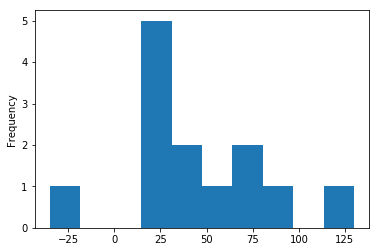

In [19]:
data['difference'] = data['F'] - data['S']

data.difference.plot(kind='hist')

1. Assumptions

Convenience sample. The distribution might be normal, but we are doing two-sided test that is robust when data is slightly skewed.

2. Hypotheses
    - $H_0: \mu = 0$
    - $H_a: \mu \ne 0$

3. Test statistic

In [20]:
d = DescrStatsW(data['difference'], ddof=1)
mu_0 = 0
h_a = 'two-sided'

# test statistic and p-value
tstat, pval, df = (round(x, 3) for x in d.ttest_mean(mu_0, alternative=h_a))
print(tstat)

4.031


4. P-value

In [21]:
print('p-value:', pval)
print('p-value < 0.05:', pval<0.05)

p-value: 0.002
p-value < 0.05: True


5. Conclusion

We reject the null hypothesis. Although, when using a convenience sample we have to be very carefour when interfering for the whole population.

### 9.39 Anorexia in teenage girls

In [24]:
data = np.array([11, 11, 6, 9, 14, -3, 0, 7, 22, -5, -4, 13, 13, 9, 4, 6, 11])
d = DescrStatsW(data, ddof=1)

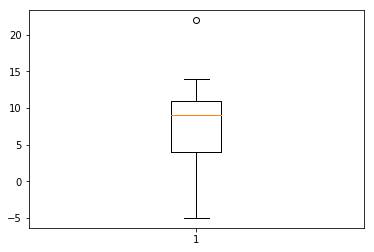

In [25]:
plt.boxplot(data);

In [26]:
d.mean, d.std, d.std_mean

(7.294117647058823, 7.183006907646276, 1.7421350699862868)

In [27]:
ttest, pval, _ = d.ttest_mean(0, alternative='two-sided')
print('ttest:', ttest)
print('pval:', pval)

ttest: 4.186884112904196
pval: 0.0006973645109728184


### 9.40 Sensitivity study 

In [28]:
data = np.array([1.7, 0.7, -0.1, -0.7, -3.5, 14.9, 3.5, 17.1, -7.6, 1.6, 11.7, 6.1, 1.1, -4, 20.9, -9.3,
                2.1, 1.4, -0.3, -3.7, -1.4, -0.8, 2.4, 12.6, 1.9, 3.9, 0.1, 15.4, -0.7])
d = DescrStatsW(data, ddof=1)

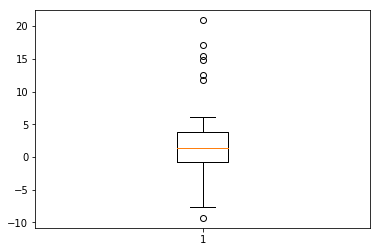

In [29]:
plt.boxplot(data);

In [30]:
d.mean, d.std, d.std_mean

(3.0000000000000004, 7.3204215335301175, 1.3593681522674477)

In [31]:
ttest, pval, _ = d.ttest_mean(0, alternative='two-sided')
print('ttest:', ttest)
print('pval:', pval, '\t pval<0.05:', pval < 0.05)

ttest: 2.2069076688283102
pval: 0.035687923981239 	 pval<0.05: True
